In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df_loans = pd.read_csv("data/loans_no_descriptions.csv")

In [17]:
df_loans.head(20)

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,657307,Aivy,English,125.0,125.0,funded,1511246.0,NaN,General Store,Retail,...,7.0,3,2,1,NaN,Aivy,female,true,irregular,field_partner
1,657259,Idalia Marizza,Spanish,400.0,400.0,funded,1507947.0,NaN,Used Clothing,Clothing,...,8.0,11,2,1,NaN,Idalia Marizza,female,true,monthly,field_partner
2,658010,Aasia,English,400.0,400.0,funded,1512245.0,NaN,General Store,Retail,...,14.0,16,2,1,"#Woman Owned Biz, #Supporting Family, user_fav...",Aasia,female,true,monthly,field_partner
3,659347,Gulmira,Russian,625.0,625.0,funded,1514419.0,NaN,Farming,Agriculture,...,14.0,21,2,1,user_favorite,Gulmira,female,true,monthly,field_partner
4,656933,Ricky\t,English,425.0,425.0,funded,1506830.0,NaN,Farming,Agriculture,...,7.0,15,2,1,"#Animals, #Eco-friendly, #Sustainable Ag",Ricky\t,male,true,bullet,field_partner
5,659605,Gloria,English,350.0,350.0,funded,1282589.0,NaN,Farming,Agriculture,...,8.0,13,1,1,NaN,Gloria,female,true,monthly,field_partner
6,660240,Elsie,English,125.0,125.0,funded,1515766.0,NaN,Agriculture,Agriculture,...,8.0,4,1,1,NaN,Elsie,female,true,irregular,field_partner
7,661601,Francisco,Spanish,1600.0,1600.0,funded,1517749.0,NaN,Agriculture,Agriculture,...,26.0,49,1,1,"user_favorite, #Biz Durable Asset, #Animals, #...",Francisco,male,true,irregular,field_partner
8,661960,Juanita,English,350.0,350.0,funded,1517942.0,NaN,Farming,Agriculture,...,10.0,13,2,1,NaN,Juanita,female,true,irregular,field_partner
9,662117,Dukure Group,French,1825.0,1825.0,funded,1517599.0,NaN,Clothing,Clothing,...,10.0,46,1,1,user_favorite,"Viola, Pelagie, Sonia, Godelieve","female, female, female, female","true, true, true, true",monthly,field_partner


In [24]:
df_loans['POSTED_TIME'].head()

0    2014-01-15 02:23:45.000 +0000
1    2014-01-14 20:23:20.000 +0000
2    2014-01-16 11:32:58.000 +0000
3    2014-01-20 09:59:48.000 +0000
4    2014-01-14 05:46:21.000 +0000
Name: POSTED_TIME, dtype: object

In [25]:
df_loans['POSTED_TIME_DATE'] = pd.to_datetime(df_loans['POSTED_TIME'])

In [26]:
df_loans['POSTED_TIME_DATE'].head()

0   2014-01-15 02:23:45
1   2014-01-14 20:23:20
2   2014-01-16 11:32:58
3   2014-01-20 09:59:48
4   2014-01-14 05:46:21
Name: POSTED_TIME_DATE, dtype: datetime64[ns]

In [28]:
df_loans['POSTED_TIME'] = pd.to_datetime(df_loans['POSTED_TIME'])
df_loans['PLANNED_EXPIRATION_TIME'] = pd.to_datetime(df_loans['PLANNED_EXPIRATION_TIME'])

In [34]:
df_loans['POSTED_TIME'].dt.day

0          15
1          14
2          16
3          20
4          14
5          21
6          22
7          24
8          26
9          27
10          2
11         21
12         22
13         23
14         24
15         31
16         31
17          3
18          2
19          2
20          2
21         30
22          4
23          6
24          6
25          7
26          7
27          8
28         10
29         12
           ..
1419577    28
1419578    28
1419579     1
1419580     1
1419581     1
1419582    23
1419583    24
1419584    25
1419585    27
1419586    30
1419587     1
1419588     1
1419589     1
1419590     1
1419591    21
1419592    23
1419593    23
1419594    24
1419595    24
1419596    24
1419597    24
1419598    26
1419599    27
1419600    27
1419601    30
1419602     1
1419603     1
1419604     2
1419605     2
1419606     2
Name: POSTED_TIME, Length: 1419607, dtype: int64

In [37]:
df_loans['POSTED_TIME'].dt.month

AttributeError: 'Series' object has no attribute 'month'

In [30]:
df_loans['PLANNED_DURATION'] = df_loans['PLANNED_EXPIRATION_TIME'] - df_loans['POSTED_TIME']
df_loans['PLANNED_DURATION'].head()

0   30 days 01:06:21
1   71 days 02:01:47
2   30 days 09:37:07
3   31 days 17:10:14
4   30 days 00:23:41
Name: PLANNED_DURATION, dtype: timedelta64[ns]

In [32]:
df_loans['PLANNED_DURATION'].dt.days

0          30.0
1          71.0
2          30.0
3          31.0
4          30.0
5          30.0
6          30.0
7          31.0
8          30.0
9          51.0
10         52.0
11         30.0
12         30.0
13         62.0
14         30.0
15         54.0
16         55.0
17         51.0
18         32.0
19         33.0
20         32.0
21         32.0
22         31.0
23         31.0
24         31.0
25         32.0
26         37.0
27         32.0
28         32.0
29         31.0
           ... 
1419577    32.0
1419578    32.0
1419579    34.0
1419580    31.0
1419581    32.0
1419582    32.0
1419583    33.0
1419584    52.0
1419585    33.0
1419586    34.0
1419587    31.0
1419588    32.0
1419589    32.0
1419590    33.0
1419591    35.0
1419592    54.0
1419593    33.0
1419594    33.0
1419595    33.0
1419596    34.0
1419597    33.0
1419598    33.0
1419599    33.0
1419600    33.0
1419601    31.0
1419602    31.0
1419603    32.0
1419604    32.0
1419605    33.0
1419606    32.0
Name: PLANNED_DURATION, 

KeyboardInterrupt: 

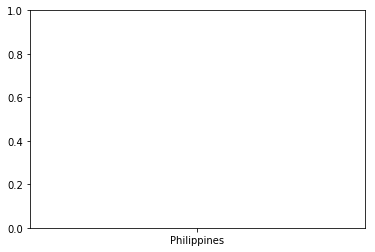

In [23]:
df_loans['COUNTRY_NAME'].hist()